# DATA SCIENCE INDIVIDUAL PROJECT PROPOSAL

In this project, we will be using the player.csv dataset. We have variables about their experience level, age, gender, name, email, how many hours they've played, whether they're subscribed to newsletters, individual Id, and their associated organizations. There are issues in this datasets such as the two completely empty columns (individualId, organizationName) making the data untidy which we'll need to address during data cleaning.

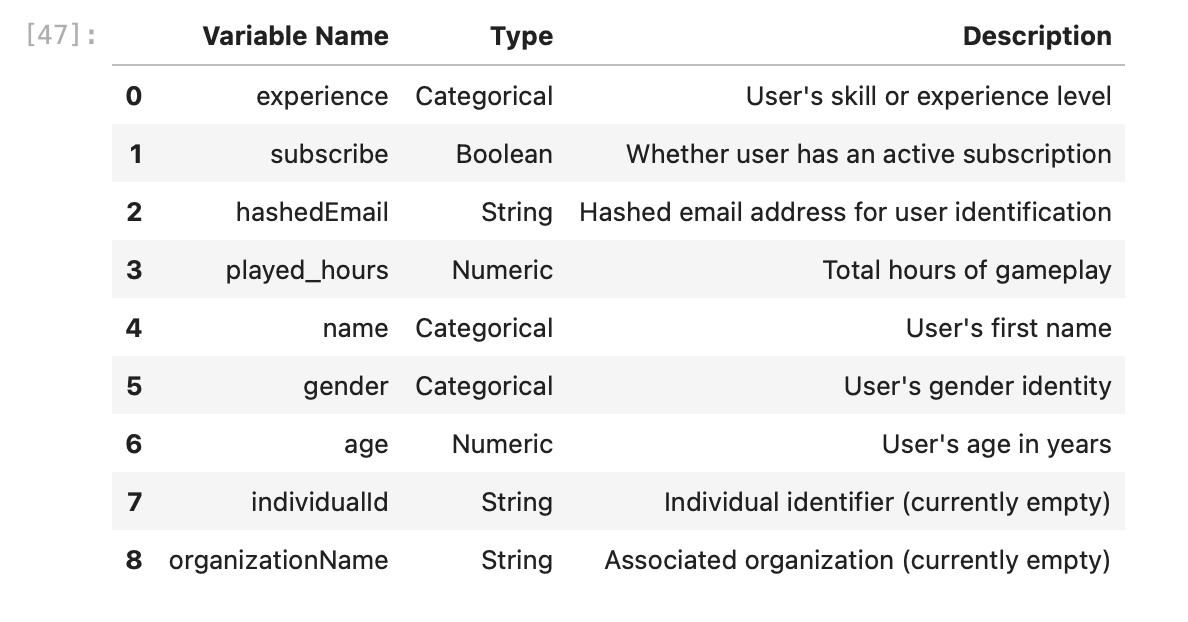

For this project, our group chose Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? We want to predict whether a player will subscribe to the newsletter based on their age, played hours, and experience level. Our specific predictive question is: Can we predict whether a player will subscribe to the game-related newsletter using their age, played hours, and experience level? To get the data ready for analysis, we first drop the two entirely empty columns of variables (individualId, organizationName).

In [81]:
import altair as alt
import pandas as pd

In [82]:
play = "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players = pd.read_csv(play)

players

,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
0,Pro,True,f6daba428a5e19a3d47574858c13550499be23603422e6...,30.3,Morgan,Male,9,NaN,NaN
1,Veteran,True,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa9397...,3.8,Christian,Male,17,NaN,NaN
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17,NaN,NaN
3,Amateur,True,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4f...,0.7,Flora,Female,21,NaN,NaN
4,Regular,True,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb...,0.1,Kylie,Male,21,NaN,NaN
...,...,...,...,...,...,...,...,...,...
191,Amateur,True,b6e9e593b9ec51c5e335457341c324c34a2239531e1890...,0.0,Bailey,Female,17,NaN,NaN
192,Veteran,False,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778...,0.3,Pascal,Male,22,NaN,NaN
193,Amateur,False,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db29...,0.0,Dylan,Prefer not to say,17,NaN,NaN
194,Amateur,False,f19e136ddde68f365afc860c725ccff54307dedd13968e...,2.3,Harlow,Male,17,NaN,NaN


In [83]:
players = players.dropna(axis=1, how='all')

players

,experience,subscribe,hashedEmail,played_hours,name,gender,age
0,Pro,True,f6daba428a5e19a3d47574858c13550499be23603422e6...,30.3,Morgan,Male,9
1,Veteran,True,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa9397...,3.8,Christian,Male,17
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17
3,Amateur,True,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4f...,0.7,Flora,Female,21
4,Regular,True,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb...,0.1,Kylie,Male,21
...,...,...,...,...,...,...,...
191,Amateur,True,b6e9e593b9ec51c5e335457341c324c34a2239531e1890...,0.0,Bailey,Female,17
192,Veteran,False,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778...,0.3,Pascal,Male,22
193,Amateur,False,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db29...,0.0,Dylan,Prefer not to say,17
194,Amateur,False,f19e136ddde68f365afc860c725ccff54307dedd13968e...,2.3,Harlow,Male,17


 **Chart 1: Experience vs. The Average Played Hours (colored by subscription)**.

The mark bar shows whether more experienced players tend to play more hours with Average Played Hours on the y-axis and Experience on the x-axis.

Experience is sort by beginner to professional order (Beginner, Amateur, Regular, Veteran, Pro)

In [84]:
experience_hours = alt.Chart(players).mark_bar(opacity=0.8).encode(
    x=alt.X('experience:N', title='Experience Level', sort = ['Beginner', 'Amateur', 'Regular', 'Veteran', 'Pro']),
    y=alt.Y('mean(played_hours):Q', title='Average Played Hours'),
    color=alt.Color('subscribe', title='Subscribed?')
).properties(
    title='Average Played Hours by Experience Level (Colored by Subscription)'
)

experience_hours

alt.Chart(...)

The bar chart shows that average played hours increase as experience level rises, from Beginners to Pros. This shows that more experienced players generally spend more time playing. Other than that, within nearly every experience level, subscribed players tend to have higher average played hours than non-subscribers.


**Chart 2: Played Hours vs Age (colored by subscription)**

This shows whether subscribed users spend more time playing across different ages with Played Hours on the y-axis and Age on the x-axis

In [85]:
hours_age = alt.Chart(players).mark_circle(size=60, opacity=0.8).encode(
    x=alt.X('age:Q', title='Age (years)'),
    y=alt.Y('played_hours:Q', title='Played Hours'),
    color=alt.Color('subscribe:N', title='Subscribed'),
    tooltip=['name', 'experience', 'subscribe', 'age', 'played_hours']
).properties(
    title='Played Hours vs Age (Colored by Subscription)'
)

hours_age

alt.Chart(...)

The scatter plot illustrates the relationship between age and played hours, colored by subscription status. Younger players show a wide range of played hours, while older players generally play fewer hours. Subscribed players are more likely found at higher played hours, regardless of age, indicating that subscription correlates with more dedicated gameplay across age groups.

To solve this problem, we're using K-Nearest Neighbors (KNN) classification. We chose classification because we're working with a categorical variable rather than a continuous variable. The idea is to predict whether a player will subscribe by looking at the subscription behavior of similar. This method is appropriate because our outcome variable isn't something we can measure on a continuous scale. We can't use regression since the variable we're predicting isn't quantitative numerical variable. 


The method does come with several assumptions and requirements such as variables like gender, email, and name have no impact on subscription behaviour and these are just identifiers don't actually influence the decision to subscribe. We’re also assuming that players who are close together in terms of age, hours played, and experience level actually behave similarly when it comes to subscribing. We have several limitations such as KNN doesn't tell us which specific variables matter most or by how much, it just makes predictions based on nearest neighbors. The method also doesn't explain why certain players subscribe, just that similar players tend to subscribe. 


We first fit three KNN classification models, each using a different pair of variables to predict subscription status: age with played hours, age with experience level, and played hours with experience level. First, we compare these models qualitatively by examining scatter plot visualizations for clear colour separation between subscribed and non-subscribed players, then quantitatively through cross-validation. Then we split our data 75-25 into training and testing sets, use cross-validation on the training set to find the optimal k value for each model, and measure accuracy, precision, and recall. The model with highest accuracy is the most predictive. After identifying the best model through this process of elimination, we'll test it to see how well it predicts subscription. We'll then create a final visualization showing the two most predictive variables plotted against each other with subscription status as colour.
